___

I am a self-identified scientific hacker. I love the term 'hack' because it qualifies the code I typically write. This doesn't mean I write "bad" code. Although it may make a computer engineer cringe, I'm not a dev and I'm not pretending to be either. The code is a means to an end where the end, the science, is what matters. 

There are plenty of arguments out there reqarding the quality and reproducibility of scientific code, and I don't disagree on most points. The fact is that scientists that program should be formally educated beyond a 101 class in computer programming (Visual Basic, anyone?), and we should be publishing our data and code for the sake of reproducibility and accountability. But that is not yet the expectation or the norm, and so we carry on writing messy code that usually works but is rarely seen by eyes other than our own.   

In [1]:
from IPython.display import Image
Image(url="http://imgs.xkcd.com/comics/code_quality.png") 

(<a>xkcd.com/1513</a>)

I now have about 8 years of experience coding in Python among other object oriented languages, but for the first time this summer I'll have the chance to focus on the code over the science and learn a thing or two about development and open source collaboration. Even better, I'll be contributing to [Astropy](http://www.astropy.org/), an open source Python package widely used and highly valued among astronomers for data analysis.

<b><font size="5">Google Summer of Code</font></b>


If you're interested in the details of my Google Summer of Code project, you can see the proposal [here](https://github.com/astropy/astropy/wiki/GSoC-2015-Application-Patti-Carroll:-Efficient-and-Precise-Model-Rasterization). In short, I'll be implementing functionality for efficient evaluation and rasterization of source models into Astropy. 


By way of motivation, say I want a million pixel model image of 1000 galaxies in 3 filters (RGB), and for simplicity they can all be described as 2D gaussians. That's enough to make my laptop sweat a little and this is just a toy model. 

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from photutils.datasets import make_gaussian_sources
from astropy import table
import time

def gen_source_table(imshape, nsrc):
    data = {}
    data['x_mean'] = np.random.rand(nsrc)*imshape[1]
    data['y_mean'] = np.random.rand(nsrc)*imshape[0]
    data['r_flux'] = np.abs(np.random.randn(nsrc)+10.)
    data['g_flux'] = np.abs(np.random.randn(nsrc)+10.)
    data['b_flux'] = np.abs(np.random.randn(nsrc)+10.)
    data['x_stddev'] = np.abs(np.random.rand(nsrc)*5+3.)
    data['y_stddev'] = np.abs(np.random.rand(nsrc)*5+3.)
    data['theta'] = np.random.rand(nsrc)*np.pi*2.
    return table.Table(data)

tab = gen_source_table((800,1250),1000)

print "Generating Image"
t1=time.time()
img = np.zeros((800,1250, 3), dtype=float)
for i,c in enumerate('rgb'):
    tab['flux']=tab[c+'_flux']
    img[:,:,i] = make_gaussian_sources((800,1250),tab, oversample=1)
t2=time.time()
print '%i min %i sec' %((t2-t1)/60,(t2-t1)%60)


Generating Image
3 min 24 sec


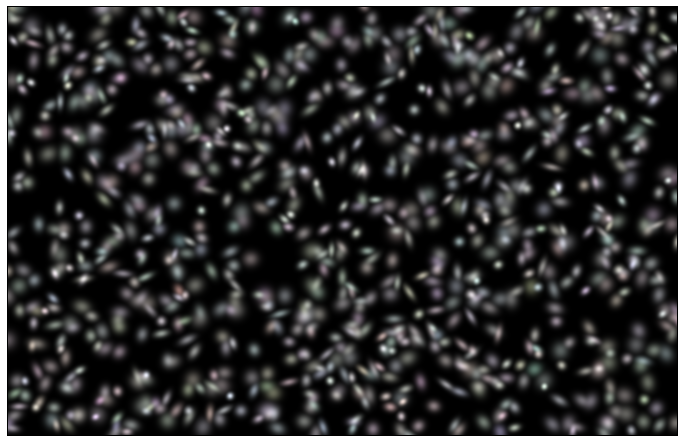

In [6]:
plot_img=img/img.max()
plt.figure(figsize=(12,8))
plt.imshow(np.sqrt(plot_img),origin='lower',interpolation='bicubic')
xt=plt.xticks([])
yt=plt.yticks([])


In reality, astronomical images can be much, much larger and the source models much more complex. Add to that the fact that the source model must be convolved with a model of how the optical system "sees" the source, that you probably want to iteratively fit models to data images, and that your models can be both non-analytic and variable ... well you get the idea. 

This is not a new problem and fortunately various software solutions already exist. The goal of this project is to integrate some of the existing functionality of Astropy and other open source software packages into a more efficient model convolution, fitting, and image rasterization tool for the average astronomer.

<b><font size="5">Community Bonding</font></b>

In the weeks leading up to the start of coding, I've had several meetings with my project mentors [Axel](https://github.com/adonath) and [Christoph](https://github.com/cdeil) to discuss the [Application Program Interface](https://github.com/astropy/astropy-api/pull/13) (API). This is essentially a blueprint of the code I'm going to write and it gives me the foundation on which to build. The three main pieces are *convolution*, *integration*, and *rasterization* of the source and instrument response models. 

During the first week of coding, I will work on establishing timing benchmarks. This will allow me to become familiar with the relevant features of astropy and other packages that will become my building blocks, while quantifying limitations and establishing baselines for various use cases. This will be important to evaluate the accuracy and efficiency of the new methods at the end of the summer. 
___